In [29]:
## Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
import numpy as np
import seaborn as sns
from scipy.fft import fft  #  Importa correctamente la FFT
from scipy.signal import welch # Calcular la densidad espectral de potencia con Welch


In [3]:

xi=np.convolve([1, 0, 1, 1, 0, 8, 3, 9, 5, 4], [5, 6, 0, 0, 6, 6, 7])#Isa
print(xi)

[  5   6   5  11  12  46  76  75  92 105  90 128 105 117  59  28]


In [4]:
xl=np.convolve([1, 0, 5, 4, 2, 8, 2, 8, 5, 8], [5, 6, 0, 0, 6, 6, 2])#Lunay
print(xl)

[  5   6  25  50  40  58  90 106 119 138 112  76  82  94  58  16]


In [5]:
xa=np.convolve([1, 0, 0, 0, 1, 8, 4, 1, 0, 5], [5, 6, 0, 0, 6, 5, 5])#Ana
print(xa)

[ 5  6  0  0 11 51 73 29 12 78 99 66 25 35 25 25]


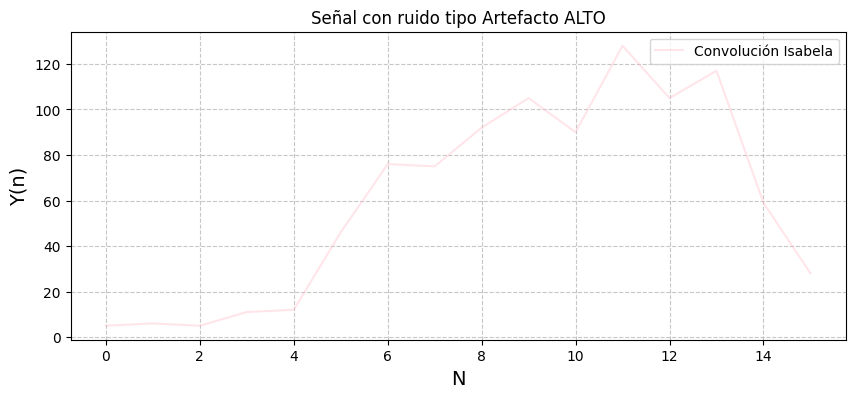

In [6]:
# Graficar
plt.figure(figsize=(10, 4))
plt.plot(xi, label="Convolución Isabela", alpha=0.4, color='pink')
plt.legend()
plt.title("Señal con ruido tipo Artefacto ALTO")
plt.xlabel("N", fontsize=14)
plt.ylabel("Y(n)", fontsize=14)

# Agregar rejilla
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

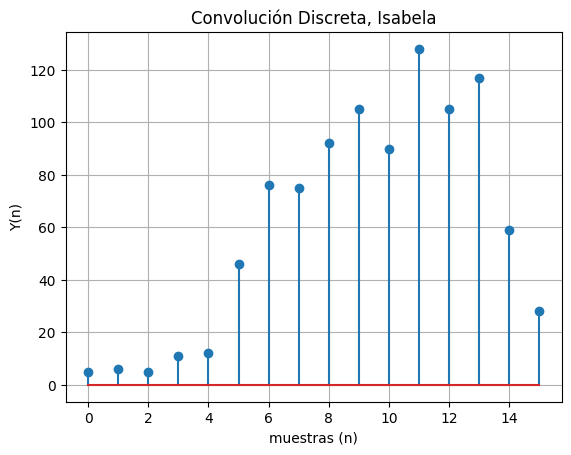

In [7]:
# Graficar la señal discreta 
plt.stem(range(len(xi)), xi)
plt.xlabel("muestras (n)")
plt.ylabel("Y(n)")
plt.title("Convolución Discreta, Isabela")
plt.grid(True)
plt.show()


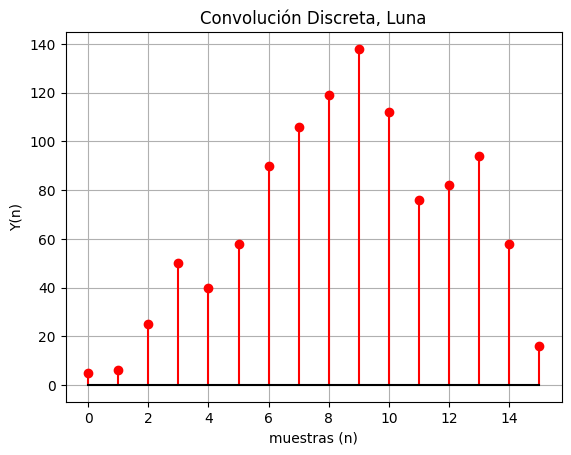

In [8]:
# Graficar la señal discreta 
plt.stem(range(len(xl)), xl, linefmt='r', markerfmt='ro', basefmt='k')
plt.xlabel("muestras (n)")
plt.ylabel("Y(n)")
plt.title("Convolución Discreta, Luna")
plt.grid(True)
plt.show()


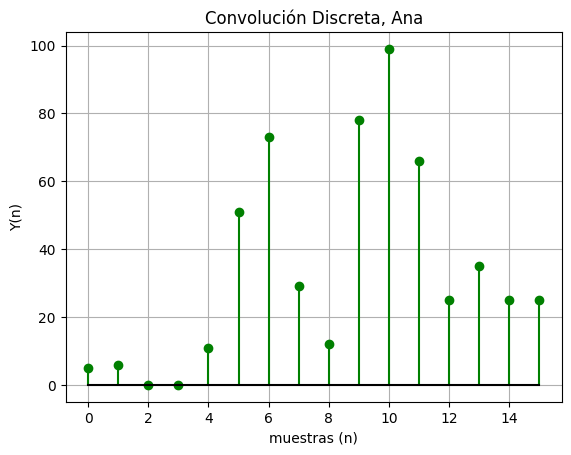

In [9]:
# Graficar la señal discreta 
plt.stem(range(len(xa)), xa, linefmt='g', markerfmt='go', basefmt='k')
plt.xlabel("muestras (n)")
plt.ylabel("Y(n)")
plt.title("Convolución Discreta, Ana")
plt.grid(True)
plt.show()


In [11]:
fs=1/1.25e-3
n=np.arange(0,10)
t= n/fs

x1=np.cos((2* np.pi*100*t))
x2=np.sin((2* np.pi*100*t))

df1=pd.DataFrame({
    'X1(n/fs)':x1,
    'X2(n/fs)':x2,
})
df1.head (10)

,X1(n/fs),X2(n/fs)
0,1.000000e+00,0.000000e+00
1,7.071068e-01,7.071068e-01
2,6.123234e-17,1.000000e+00
3,-7.071068e-01,7.071068e-01
4,-1.000000e+00,1.224647e-16
5,-7.071068e-01,-7.071068e-01
6,-1.836970e-16,-1.000000e+00
7,7.071068e-01,-7.071068e-01
8,1.000000e+00,-2.449294e-16
9,7.071068e-01,7.071068e-01


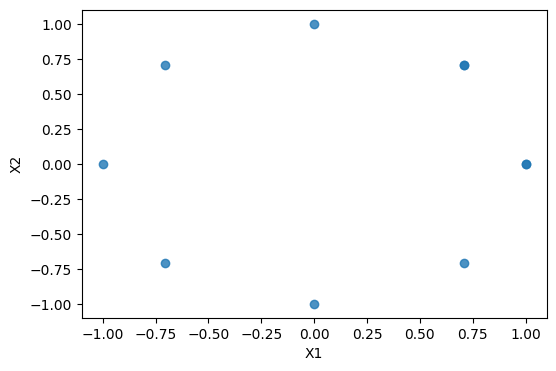

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df1['X1(n/fs)'], y=df1['X2(n/fs)'], alpha= 0.8)
ax.set_xlabel('X1')
ax.set_ylabel('X2');

In [13]:
correlacion=df1.corr()
correlacion
#pearson

##heatmap

,X1(n/fs),X2(n/fs)
X1(n/fs),1.000000,0.078783
X2(n/fs),0.078783,1.000000


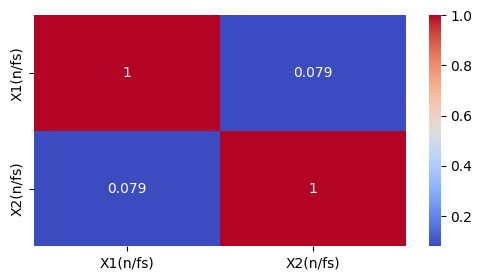

In [30]:
# Crear el heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(correlacion, annot=True, cmap="coolwarm")

# Mostrar gráfico
plt.show()

In [10]:
#Exportar documento

record = wfdb.rdrecord('rec_15')
print(record.__dict__)

{'record_name': 'rec_15', 'n_sig': 2, 'fs': 500, 'counter_freq': None, 'base_counter': None, 'sig_len': 10000, 'base_time': None, 'base_date': None, 'comments': ['Age: 25', 'Sex: male', 'ECG date: 05.04.2005'], 'sig_name': ['ECG I', 'ECG I filtered'], 'p_signal': array([[-0.385,  0.06 ],
       [-0.345,  0.02 ],
       [-0.38 , -0.01 ],
       ...,
       [-0.435, -0.005],
       [-0.405,  0.005],
       [-0.345,  0.01 ]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['rec_15.dat', 'rec_15.dat'], 'fmt': ['16', '16'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [200.0, 200.0], 'baseline': [0, 0], 'units': ['mV', 'mV'], 'adc_res': [12, 12], 'adc_zero': [0, 0], 'init_value': [-77, 12], 'checksum': [1821, 2491], 'block_size': [0, 0]}


In [33]:
# Convertir en DF global, o sea con todos los datos del documento

df_01 = pd.DataFrame(record.p_signal, columns=record.sig_name)
df_01.head(20)

,ECG I,ECG I filtered
0,-0.385,0.060
1,-0.345,0.020
2,-0.380,-0.010
3,-0.445,-0.040
4,-0.530,-0.060
5,-0.610,-0.075
6,-0.625,-0.075
7,-0.585,-0.070
8,-0.540,-0.055
9,-0.420,-0.040


In [35]:
frecuencia = 500 #dada en el documento 
num_muestra= 10000.0 #dada en la data
tiempo= np.arange(0,num_muestra/frecuencia,1/frecuencia)

In [36]:
#SE CREA LA DATA FRAME SOLO PARA SEMG RT HAM Y TIEMPO
df_rt=df_01[['ECG I filtered']]

if len(tiempo) == len(df_rt):
    # Agregar la columna de tiempo al DataFrame
    df_rt["Tiempo (s)"] = tiempo
else:
    raise ValueError("El tamaño de    el array de tiempo no coincide con el número de filas del DataFrame.")
    
df_rt.head(60)

,ECG I filtered,Tiempo (s)
0,0.060,0.000
1,0.020,0.002
2,-0.010,0.004
3,-0.040,0.006
4,-0.060,0.008
5,-0.075,0.010
6,-0.075,0.012
7,-0.070,0.014
8,-0.055,0.016
9,-0.040,0.018


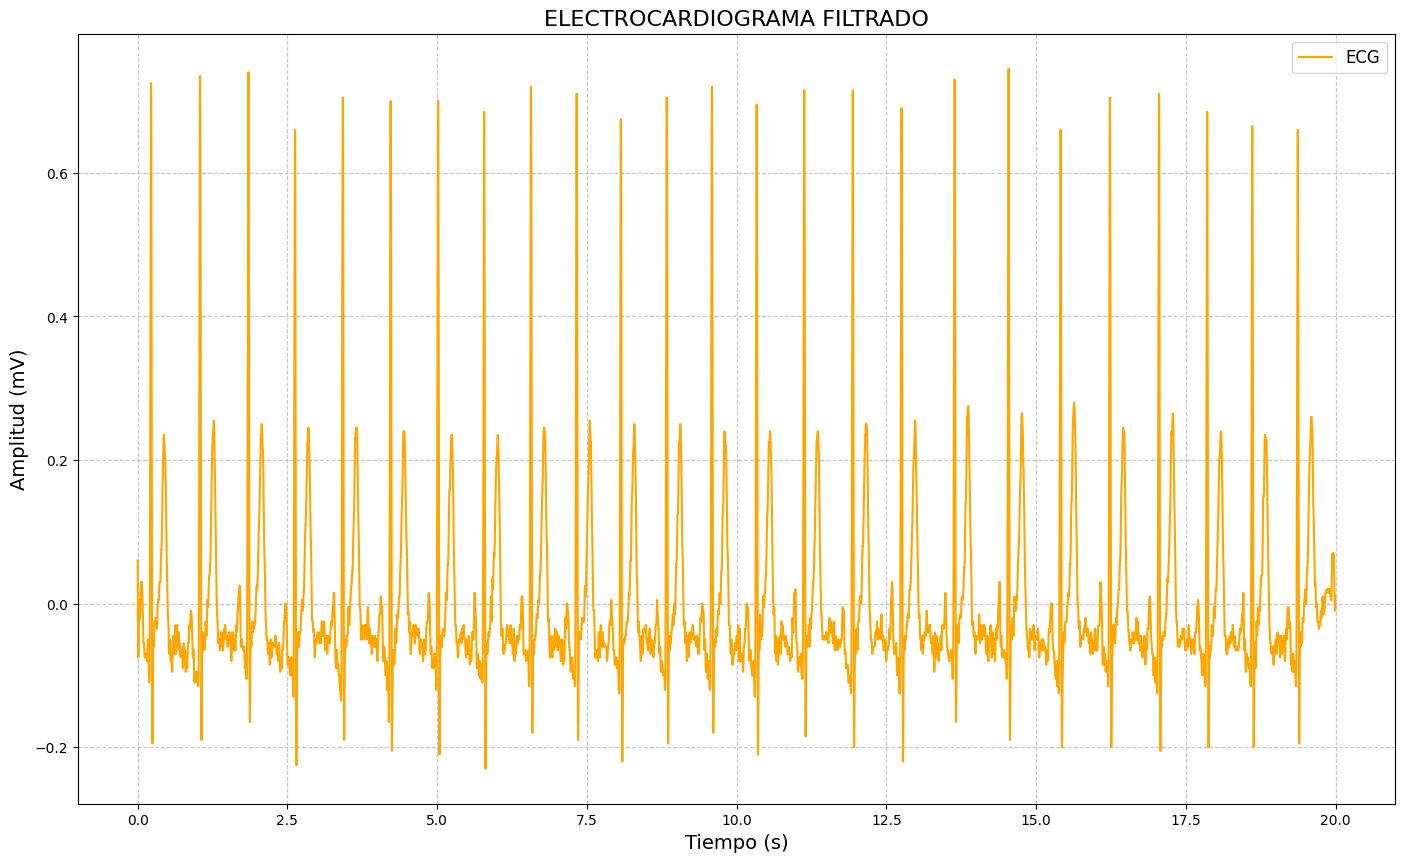

In [38]:
#2.GRAFICAR SEÑAL
plt.figure(figsize=(17, 10))  # Configura el tamaño del gráfico

# Graficar la señal ECG fitrada en función del tiempo
plt.plot(df_rt["Tiempo (s)"], df_rt["ECG I filtered"], label="ECG", color="orange")

# Etiquetas y título
plt.title("ELECTROCARDIOGRAMA FILTRADO", fontsize=16)
plt.xlabel("Tiempo (s)", fontsize=14)
plt.ylabel("Amplitud (mV)", fontsize=14)

# Agregar una rejilla y la leyenda
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.show()

In [34]:
#CALCULO DE # DE MUESTRAS - PROMEDIO - DESVIACIÓN ESTÁNDAR - VALOR MÍNIMO - CUARTILES - VALOR MÁXIMO
df_01[['ECG I filtered']].describe().T


,count,mean,std,min,25%,50%,75%,max
ECG I filtered,10000.0,0.001245,0.128674,-0.23,-0.06,-0.04,0.005,0.745


In [40]:
#MEDIA
np.mean(df_rt['ECG I filtered'])

0.0012454999999999973

In [42]:
#DESVIACIÓN ESTÁNDAR
np.std(df_rt['ECG I filtered'])

0.12866765805652172

In [39]:
#CÁLCULO DE MEDIA CON FOR
suma_total=0
media=0
for c in df_rt['ECG I filtered']:
    suma_total +=c
media=suma_total/len(df_rt['ECG I filtered'])

print("Media= " +str(media)) #STR ES PARA CONVERTIR A STRING

Media= 0.0012455000000000007


In [43]:
#CÁLCULO PARA DESVIACIÓN ESTÁNDAR

# Cálculo de las diferencias cuadradas
diferencia = [(x - media) ** 2 for x in df_rt['ECG I filtered']]

# Sumar las diferencias cuadradas
sumatoria_diferencia = sum(diferencia)

# Calcular la varianza (muestral)
varianza = sumatoria_diferencia / (len(df_rt['ECG I filtered']) - 1)

# Calcular la desviación estándar
desviacion = varianza ** 0.5

# Mostrar resultados
print("Varianza: " + str(varianza))
print("Desviación estándar: " + str(desviacion))

Varianza: 0.016557021931943583
Desviación estándar: 0.12867409192197


In [44]:
#CÁLCULO COEFICIENTE DE VARIACION
cv=(desviacion/media)*100
print("Coeficiente de variación= "+str (cv))

Coeficiente de variación= 10331.119383538331


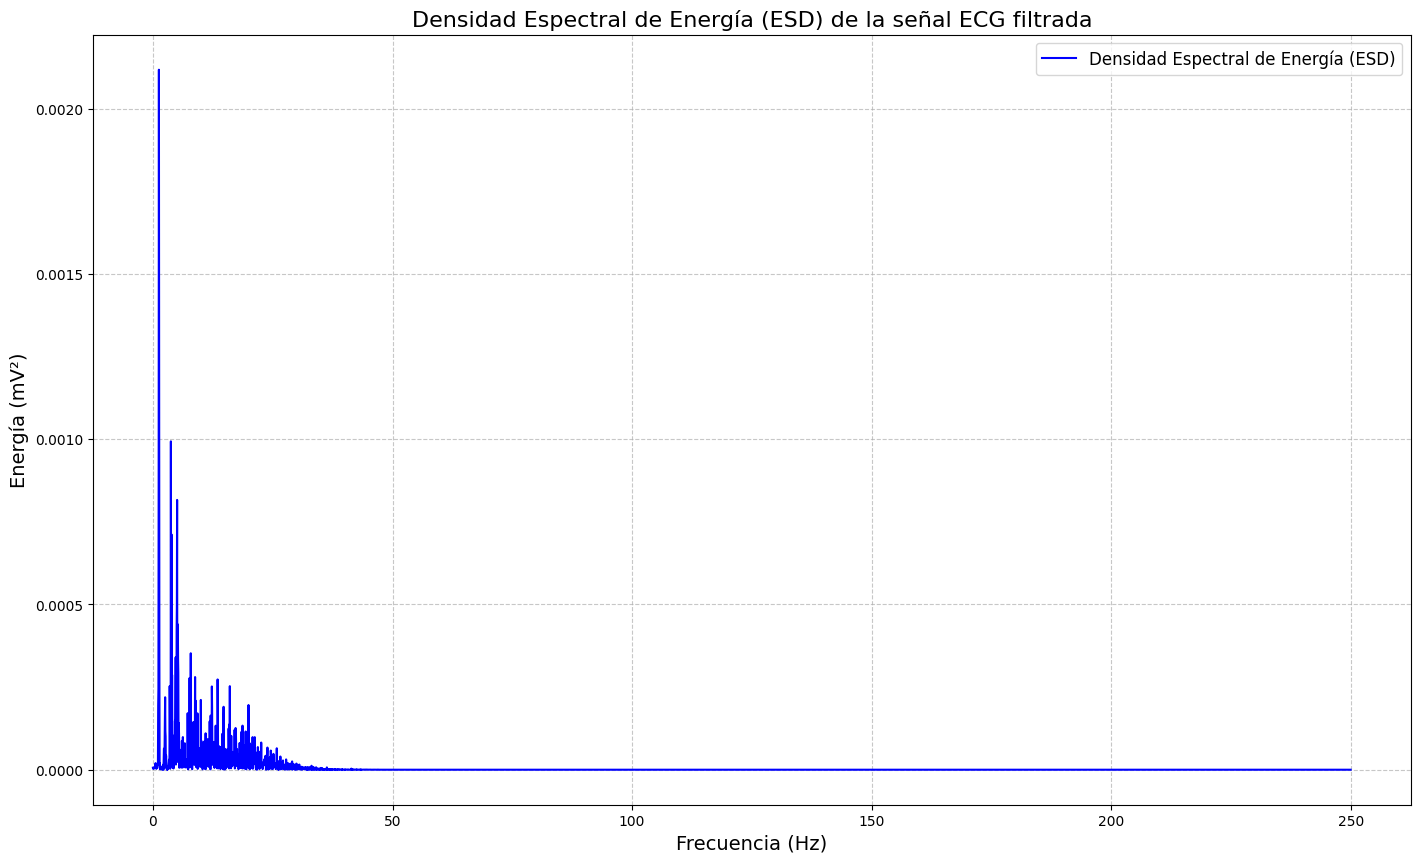

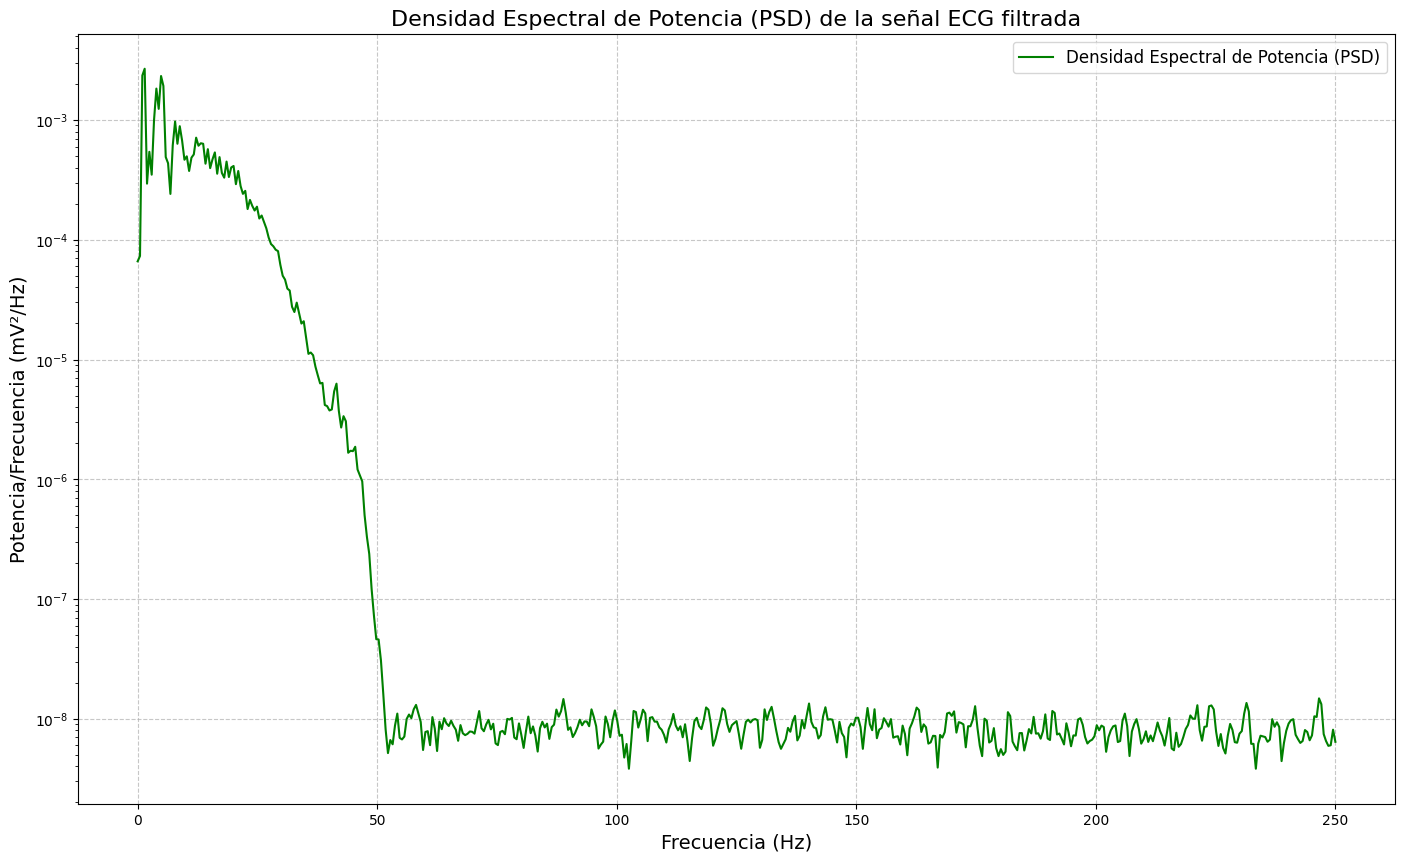

In [64]:
# 1. Calcular la Transformada de Fourier (FFT)
# Obtener la señal ECG filtrada
ecg = df_rt["ECG I filtered"].values
Fs = 500 #frecuencia de muestreo dada en el documento
# Calcular la FFT
n = len(ecg)  # Número de puntos de la señal
frecuencias = np.fft.fftfreq(n, 1/Fs)  # Frecuencias correspondientes 1/Fs =Ts
valfft = np.fft.fft(ecg)  # Valores de la FFT Devuelve un array de valores complejos que representan las componentes de frecuencia.

# Solo nos interesan las frecuencias positivasf
frecu_p = frecuencias[:n // 2] #frecp coeficientes de frecuencia positivos
fft_positivo = 2.0/n * np.abs(valfft[:n // 2]) #elimina la parte imaginaria y normaliza los valores de la FFT


# Graficar la Densidad Espectral de Energía (ESD)
plt.figure(figsize=(17, 10))
plt.plot(frecu_p, fft_positivo**2, label="Densidad Espectral de Energía (ESD)", color="blue")
plt.title("Densidad Espectral de Energía (ESD) de la señal ECG filtrada", fontsize=16)
plt.xlabel("Frecuencia (Hz)", fontsize=14)
plt.ylabel("Energía (mV²)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.show()


# Calcular la Densidad Espectral de Potencia (PSD) usando el método de Welch
frec_PSD, val_PSD = welch(ecg, fs=Fs, nperseg=1024)

# 4. Graficar la Densidad Espectral de Potencia (PSD)
plt.figure(figsize=(17, 10))
plt.semilogy(frec_PSD, val_PSD, label="Densidad Espectral de Potencia (PSD)", color="green")
plt.title("Densidad Espectral de Potencia (PSD) de la señal ECG filtrada", fontsize=16)
plt.xlabel("Frecuencia (Hz)", fontsize=14)
plt.ylabel("Potencia/Frecuencia (mV²/Hz)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.show()

In [66]:

# 1. Obtener las frecuencias y los valores de la FFT
frecu_p = frequencies[:n // 2]  # Frecuencias positivas
fft_positivo = 2.0/n * np.abs(fft_values[:n // 2])  # Magnitudes de la FFT

# 2. Calcular los estadísticos descriptivos

# Frecuencia media
media_frec = np.sum(frecu_p * fft_positivo) / np.sum(fft_positivo)

# Frecuencia mediana
suma = np.cumsum(fft_positivo)  # Suma acumulada de las magnitudes de la FFT
xm = np.where(cumulative_sum >= cumulative_sum[-1] / 2)[0][0] # Índice donde se alcanza la mitad de la energía
mediana_frec = frecu_p[xm]  # Frecuencia correspondiente al índice

# Desviación estándar de la frecuencia
desviacion_frec = np.sqrt(np.sum(fft_positivo * (frecu_p - media_frec)**2) / np.sum(fft_positivo))

# 3. Imprimir los resultados
print(f"Frecuencia media: {media_frec:.2f} Hz")
print(f"Frecuencia mediana: {mediana_frec:.2f} Hz")
print(f"Desviación estándar de la frecuencia: {desviacion_frec:.2f} Hz")



Frecuencia media: 18.44 Hz
Frecuencia mediana: 13.50 Hz
Desviación estándar de la frecuencia: 25.97 Hz


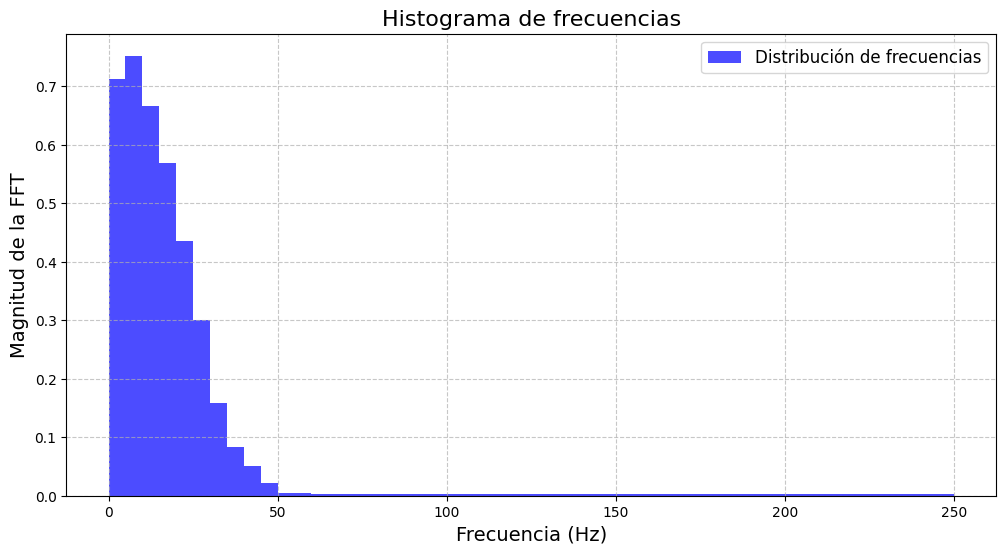

In [71]:
#HISTOGRAMA

plt.figure(figsize=(12, 6))
plt.hist(frecu_p, bins=50, weights=fft_positivo, color="blue", alpha=0.7, label="Distribución de frecuencias")
plt.title("Histograma de frecuencias", fontsize=16)
plt.xlabel("Frecuencia (Hz)", fontsize=14)
plt.ylabel("Magnitud de la FFT", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.show()